# Analysis of Unanswered Chats on Chatbot Website 

In this Analysis what we are tryng to locate is the amount of chats unanswered for our online rater

In [3]:
# First import the libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time 

# Path to chromedriver executable
chromedriver_path = "E:\chromedriver.exe"

# URL of the website you want to test
url = "https://website.com"

# username and password
username = "username_of_website"
password = "password"


# Create a new instance of the Chrome driver
driver = webdriver.Chrome(executable_path=chromedriver_path)


# Open the website
driver.get(url)
driver.maximize_window()
# Find the username and password input fields and fill them in
username_field = driver.find_element(By.ID, "email")
username_field.send_keys(username)

time.sleep(1)
# Send pasword
password_field = driver.find_element(By.ID, "password")  
password_field.send_keys(password)

# Submit the form
password_field.send_keys(Keys.RETURN)

time.sleep(5) # wait for the page to load

# Click on the chat icon
click_chat = driver.find_element(By.XPATH, "//i[@class='tawk-icon tawk-icon-inbox tawk-icon-large inbox']")
click_chat.click()


time.sleep(5)

filter1 = driver.find_element(By.XPATH,'//*[@id="tawk-content-view"]/div[2]/div[1]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/button')
filter1.click()

time.sleep(1)
filter2 = driver.find_element(By.XPATH,'//*[@id="tawk-content-view"]/div[2]/div[1]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div/ul/li[1]/div/div')
filter2.click()

time.sleep(2)
Unassigned = driver.find_element(By.XPATH,'//*[@id="tawk-content-view"]/div[2]/div[1]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div/div/div/div/ul/li[2]/div/div')
Unassigned.click()

time.sleep(2)



# Initialize lists to store data
data = []
columns = ['type','contact','details','agent','status','updated_at']

def click_next_page(driver):
    for _ in range(26): # the website only hide the button of next page, so  is just set the number of pages
        try:
            # Initializa Beatiful soup to do the parsing
            page_source = driver.page_source
            soup = BeautifulSoup(page_source, 'html.parser')
            table = soup.find('table', class_='tawk-table')
            # Extract data rows
            rows = table.find_all('tr')
            for row in rows:
                row_data = []
                columns_data = row.find_all('td')
                for column_data in columns_data:
                    row_data.append(column_data.text.strip())
                data.append(row_data)
                
            # Keep looking on more pages.
            next_page = driver.find_element(By.XPATH,'//*[@id="tawk-content-view"]/div[2]/div[1]/div/div/div[2]/div/div/div/div[1]/button[2]/i') 
            next_page.click()
            time.sleep(3)
#             if next_page: 
#                 next_page.click()
#                 time.sleep(3)

       
        except Exception as e:
            print(f"something went wrong: {str(e)}")
            break
            
           

            
click_next_page(driver)
print('Search and Scrape Completed')
# Close the browser window
driver.quit()


C:\Users\marcorob\AppData\Local\Temp\ipykernel_63316\1677887519.py:23: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=chromedriver_path)


Search and Scrape Completed


##### Analysis Section (After scrape is completed)

In [4]:
# Create DataFrame using pandas
columns = ['flag','type','contact','details','unassigned','status','updated_at']
df = pd.DataFrame(data,columns=columns)
df = df[['contact','details','status','updated_at']]
df.head(5)

,contact,details,status,updated_at
0,None,None,None,None
1,pedro jose soza martinez,Name : pedro jose soza martinez\nType your que...,Open,Feb 29 at 08:44 AM
2,Dana Lacher,My policy expires on 3/1/24 and I would like t...,Open,Feb 29 at 07:25 AM
3,Aaliyah,?,Open,Feb 28 at 10:10 PM
4,Michael,What type of quote can I get,Open,Feb 28 at 09:49 PM


In [5]:
df.dtypes

contact       object
details       object
status        object
updated_at    object
dtype: object

After Review the type of our dataframe, lets conver our `updated_at` field to datetime to future analysis

In [6]:
# the format of date is inconsistent thats why i bring a different library to convert to datetime.

from dateutil import parser

# Custom function to parse datetime strings into datetime objects
def parse_custom_datetime(datetime_str):
    if datetime_str is not None:
        return parser.parse(datetime_str)
    else:
        return None

# Convert the 'updated_at' column to datetime using the custom function
df['updated_at'] = df['updated_at'].apply(parse_custom_datetime)


Now lets count Nulls in our dataset

In [7]:
# Count how many nulls
df.isnull().sum()

contact       26
details       26
status        26
updated_at    26
dtype: int64

Cause looks like is the same amount of null values i will just remove it

In [8]:
# Let me know the 
df = df.dropna()

Lets count now unique values

In [9]:
df.nunique()

contact       1117
details       1183
status           2
updated_at    1290
dtype: int64

##### Here i Will create some graphs to visualize my results

In [10]:
# First thing i create different columns for an analysis on Excel.
df['date'] = df['updated_at'].dt.date
df['month'] = df['updated_at'].dt.month
df['year'] = df['updated_at'].dt.year
df['weekday'] = df['updated_at'].dt.dayofweek +1 # Monday=0, Sunday=6
df['hour'] = df['updated_at'].dt.hour

In [11]:
df.head(5)

,contact,details,status,updated_at,date,month,year,weekday,hour
1,pedro jose soza martinez,Name : pedro jose soza martinez\nType your que...,Open,2024-02-29 08:44:00,2024-02-29,2,2024,4,8
2,Dana Lacher,My policy expires on 3/1/24 and I would like t...,Open,2024-02-29 07:25:00,2024-02-29,2,2024,4,7
3,Aaliyah,?,Open,2024-02-28 22:10:00,2024-02-28,2,2024,3,22
4,Michael,What type of quote can I get,Open,2024-02-28 21:49:00,2024-02-28,2,2024,3,21
5,Deandre Montrell Dumas,Name : Deandre Montrell Dumas\nType your quest...,Open,2024-02-28 20:18:00,2024-02-28,2,2024,3,20


In [12]:
# send to excel to Create an Interactive Dashboard with this Data.
df.to_excel('E:\\Scrape_result.xlsx', index=False)

# Lets visualize the Data.

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Count the number of chats for each hour
chat_count_by_hour = df['hour'].value_counts()

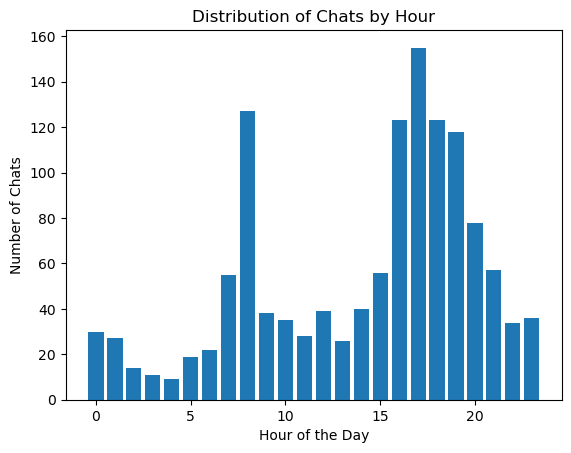

In [15]:
# Create a bar chart to visualize the data
plt.bar(chat_count_by_hour.index, chat_count_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Chats')
plt.title('Distribution of Chats by Hour')
plt.show()

In [16]:
# Count the number of chats for each day of the week
chat_count_by_weekday = df['weekday'].value_counts()

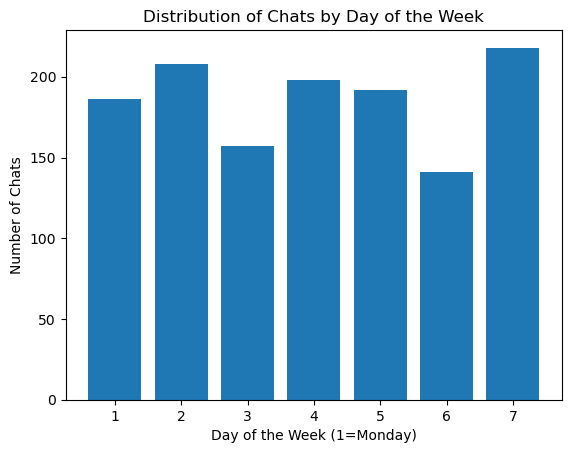

In [17]:
plt.bar(chat_count_by_weekday.index, chat_count_by_weekday.values)
plt.xlabel('Day of the Week (1=Monday)')
plt.ylabel('Number of Chats')
plt.title('Distribution of Chats by Day of the Week')
plt.show()